In [405]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [406]:
file = r'dados_pre_processados\dados.csv'

df = pd.read_csv(file, sep=';')

In [407]:
df

,cliente,tipo_de_cliente,numero_de_itens_comprados,venda_liquidas,metodo_de_pagamento,genero,estado_civil,idade
0,1,Regular,1,39.50,Discover,Homem,Casado,32
1,2,Promocional,1,102.40,Proprietary Card,Homem,Casado,36
2,3,Regular,1,22.50,Proprietary Card,Homem,Casado,32
3,4,Promocional,5,100.40,Proprietary Card,Homem,Casado,28
4,5,Regular,2,54.00,MasterCard,Homem,Casado,34
...,...,...,...,...,...,...,...,...
95,96,Regular,1,39.50,MasterCard,Mulher,Casado,44
96,97,Promocional,9,253.00,Proprietary Card,Mulher,Casado,30
97,98,Promocional,10,287.59,Proprietary Card,Mulher,Casado,52
98,99,Promocional,2,47.60,Proprietary Card,Mulher,Casado,30


In [408]:
agg_cliente_type = df.groupby('tipo_de_cliente').size().reset_index(name="quantidade")
agg_cliente_type = agg_cliente_type.sort_values(by='quantidade', ascending=False)
agg_cliente_type = agg_cliente_type.reset_index(drop=True)

agg_cliente_type


,tipo_de_cliente,quantidade
0,Promocional,70
1,Regular,30


In [409]:
agg_paymente = df.groupby('metodo_de_pagamento').size().reset_index(name="quantidade")
agg_paymente = agg_paymente.sort_values(by='quantidade', ascending=False)
agg_paymente = agg_paymente.reset_index(drop=True)

agg_paymente

,metodo_de_pagamento,quantidade
0,Proprietary Card,70
1,MasterCard,14
2,Visa,10
3,Discover,4
4,American Express,2


In [410]:
agg_genero = df.groupby('genero').size().reset_index(name="quantidade")
agg_genero = agg_genero.sort_values(by='quantidade', ascending=False)
agg_genero = agg_genero.reset_index(drop=True)

agg_genero

,genero,quantidade
0,Mulher,73
1,Homem,27


In [411]:
agg_estado_civil = df.groupby('estado_civil').size().reset_index(name="quantidade")
agg_estado_civil = agg_estado_civil.sort_values(by='quantidade', ascending=False)
agg_estado_civil = agg_estado_civil.reset_index(drop=True)

agg_estado_civil

,estado_civil,quantidade
0,Casado,84
1,Solteiro,16


In [412]:
#remover bordas]
def remove_bordas(ax):
    for spine in ax.spines.values():
        spine.set_visible(False)

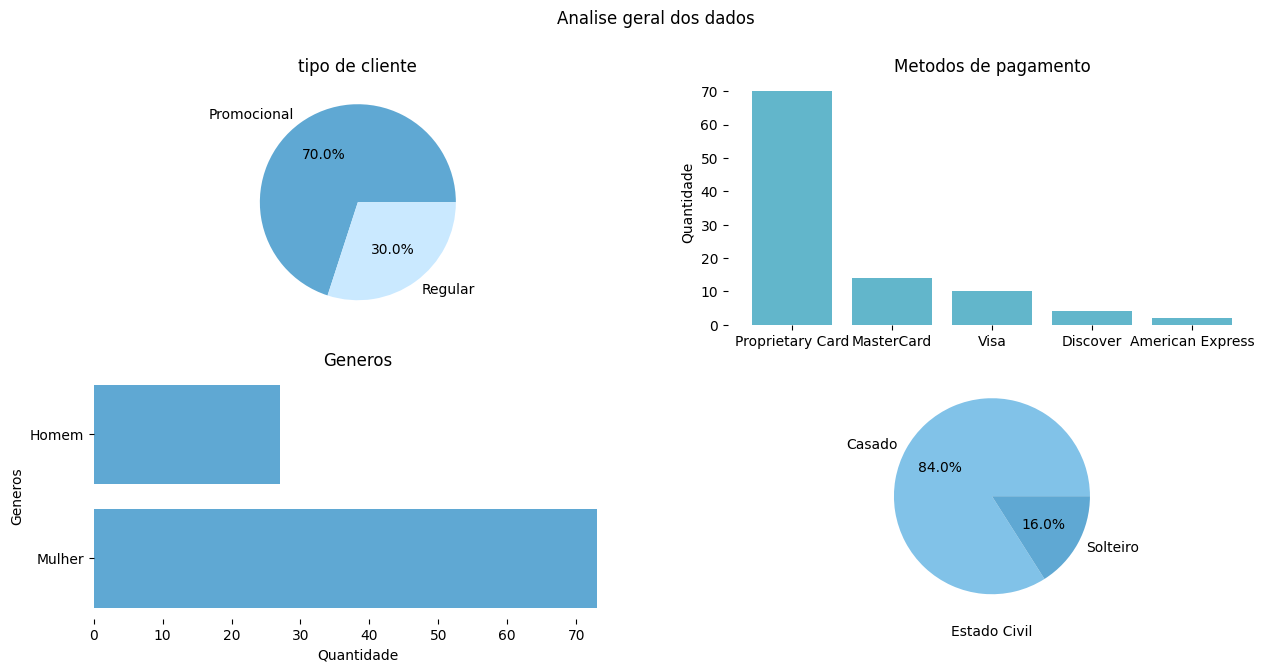

In [413]:
colors = ['#5FA8D3', '#CAE9FF']
colors2 = ['#81C2E8','#5FA8D3']

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

fig.suptitle('Analise geral dos dados')

#Grafico de pizza
ax1.pie(
    agg_cliente_type['quantidade'], 
    labels=agg_cliente_type['tipo_de_cliente'], 
    colors=colors,
    autopct='%1.1f%%',

    )
ax1.set_title('tipo de cliente')

#Grafico de barras vertical
ax2.bar(
    agg_paymente['metodo_de_pagamento'],
    agg_paymente['quantidade'],
    color='#62B6CB'
    )

ax2.set_title('Metodos de pagamento')
ax2.set_ylabel('Quantidade')
remove_bordas(ax2)

#Grafico de barras horizontal
ax3.barh(
    agg_genero['genero'], 
    agg_genero['quantidade'],
    color='#5FA8D3'
    )
ax3.set_title('Generos')
ax3.set_xlabel('Quantidade')
ax3.set_ylabel('Generos')
remove_bordas(ax3)

#Grafico de pizza estado civel
ax4.pie(
    agg_estado_civil['quantidade'], 
    labels=agg_estado_civil['estado_civil'], 
    colors=colors2,
    autopct='%1.1f%%',
    )
ax4.set_xlabel('Estado Civil')

plt.show()

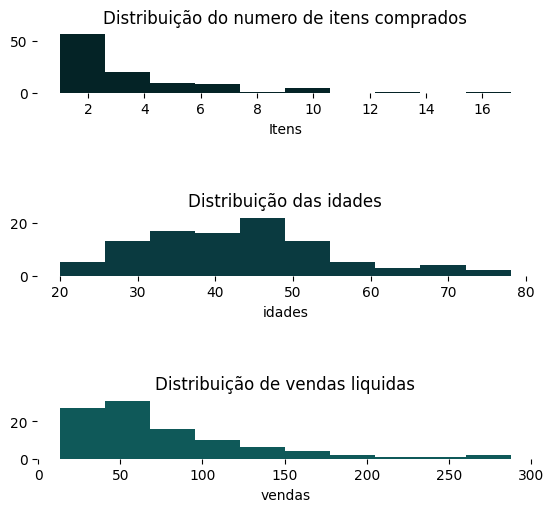

In [414]:
fig, (eixo1, eixo2, eixo3) = plt.subplots(nrows=3, ncols=1)
#configuração do grafico
plt.subplots_adjust(
    hspace=2,
    top=1   
)

#Histograma Distribuição do numero de itens comprados
eixo1.hist(
    df['numero_de_itens_comprados'],
    color='#042326'
    )
eixo1.set_title("Distribuição do numero de itens comprados")
eixo1.set_xlabel("Itens")
remove_bordas(eixo1)


#Histograma Distribuição das idades
eixo2.hist(
    df['idade'],
    color='#0A3A40'
    )
eixo2.set_title("Distribuição das idades")
eixo2.set_xlabel("idades")
remove_bordas(eixo2)

#Histograma Distribuição de vendas liquidas
eixo3.hist(
    df['venda_liquidas'],
    color='#0F5959'
    )
eixo3.set_title("Distribuição de vendas liquidas")
eixo3.set_xlabel("vendas")
remove_bordas(eixo3)








plt.show()

## Indetificamos certos pontos na analise🔍

* Nossos principais clientes são mulheres;
* 70% dos clientes são do tipo promocional; 
* A maior parte dos nossos clientes utilizams o metodo de pagamento Proprietary Card;
* Nosso metodo de pagamento que é menos utilizado é o American Express
* E não muito menos importante 84% dos clientes não estão solteiros;
* Nossos princiais cliente estão numa faixa de **35 a 48** anos 

In [415]:
#analisando separadamente os clientes promocionais
clientes_promocionais = df.loc[df['tipo_de_cliente'] == 'Promocional'].reset_index(drop=True)
clientes_promocionais.head()

,cliente,tipo_de_cliente,numero_de_itens_comprados,venda_liquidas,metodo_de_pagamento,genero,estado_civil,idade
0,2,Promocional,1,102.40,Proprietary Card,Homem,Casado,36
1,4,Promocional,5,100.40,Proprietary Card,Homem,Casado,28
2,7,Promocional,2,78.00,Proprietary Card,Homem,Casado,30
3,9,Promocional,2,56.52,Proprietary Card,Homem,Casado,46
4,12,Promocional,1,31.60,Proprietary Card,Homem,Casado,40


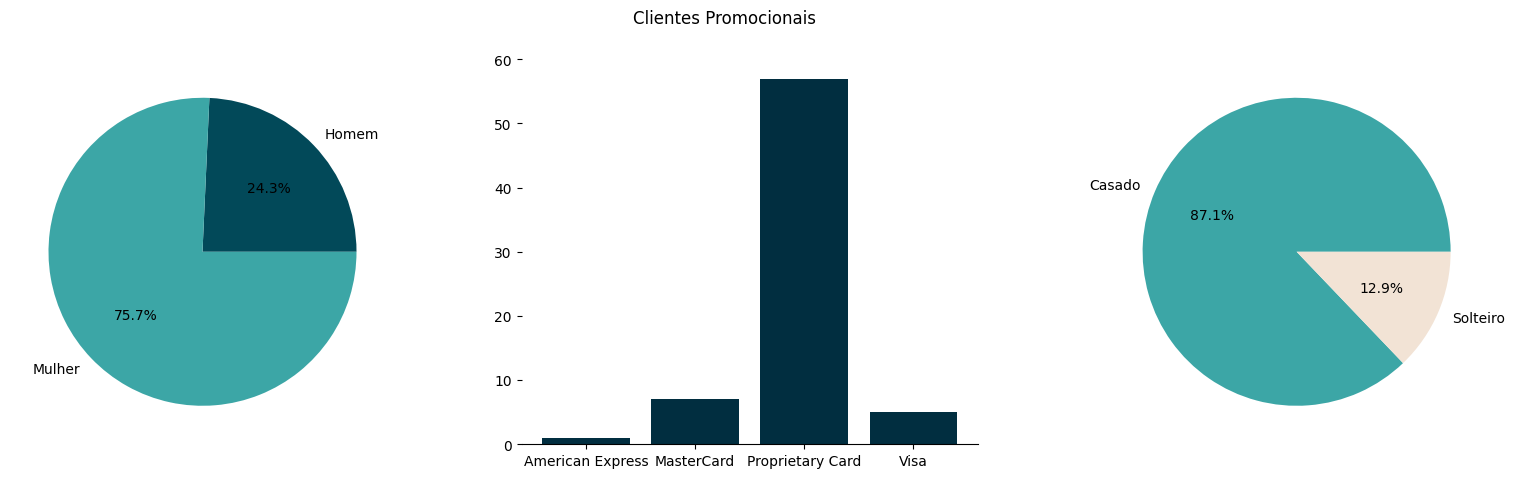

In [416]:
group_gen = clientes_promocionais.groupby('genero').size().reset_index(name='quantidade')
group_client_type = clientes_promocionais.groupby('metodo_de_pagamento').size().reset_index(name='quantidade')
group_est_civil = clientes_promocionais.groupby('estado_civil').size().reset_index(name='quantidade')

color_1 = ['#024959', '#3CA6A6']
color_2 = ['#3CA6A6','#F2E3D5']
fig, (Ax1, Ax2, Ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

fig.suptitle('Clientes Promocionais')


Ax1.pie(
    group_gen['quantidade'],
    labels=group_gen['genero'],
    colors=color_1,
    autopct='%1.1f%%'
)

Ax2.bar(
    group_client_type['metodo_de_pagamento'], 
    group_client_type['quantidade'],
    color='#012E40',
)
remove_bordas(Ax2)
Ax2.spines['bottom'].set_visible(True)

Ax2.set_yticks(np.arange(0, 70, 10))


Ax3.pie(
    group_est_civil['quantidade'], 
    labels=group_est_civil['estado_civil'],
    colors=color_2,
    autopct='%1.1f%%'
)

#Ax3.spines['bottom'].set_visible(True)


plt.show()

In [417]:
clientes_promocionais = df.loc[(df['tipo_de_cliente'] == 'Promocional') & (df['genero'] == 'Mulher')].reset_index(drop=True)
clientes_promocionais.head()


,cliente,tipo_de_cliente,numero_de_itens_comprados,venda_liquidas,metodo_de_pagamento,genero,estado_civil,idade
0,26,Promocional,1,30.02,Proprietary Card,Mulher,Casado,60
1,28,Promocional,5,192.80,Proprietary Card,Mulher,Solteiro,42
2,29,Promocional,3,71.20,Proprietary Card,Mulher,Casado,32
3,30,Promocional,1,18.00,Proprietary Card,Mulher,Casado,70
4,31,Promocional,2,63.20,MasterCard,Mulher,Casado,28


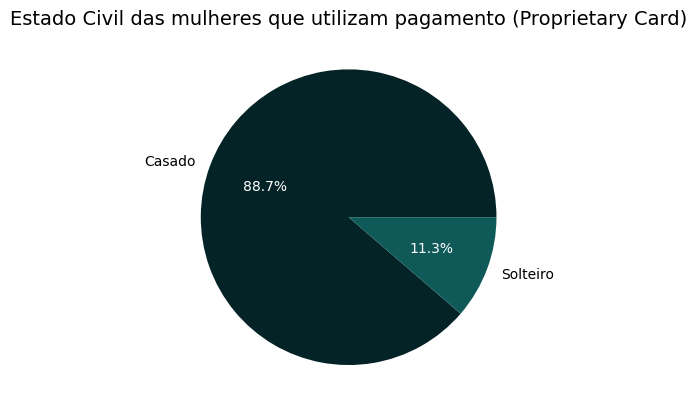

In [418]:
agg_est_civil_clientes_promo = clientes_promocionais.groupby('estado_civil').size().reset_index(name='Quantidade')

# Gráfico de pizza
wedges, texts, autotexts = plt.pie(
    agg_est_civil_clientes_promo['Quantidade'],
    labels=agg_est_civil_clientes_promo['estado_civil'],
    colors=['#042326','#0F5959'],
    autopct='%1.1f%%',
    textprops={'color': 'white'}
)

# Cores separadas
for text in texts:
    text.set_color('black')

for autotext in autotexts:
    autotext.set_color('white')

# Adiciona o título da figura corretamente
plt.title("Estado Civil das mulheres que utilizam pagamento (Proprietary Card)", fontsize=14)
plt.show()


In [419]:
clientes_promocionais.describe().round()

,cliente,numero_de_itens_comprados,venda_liquidas,idade
count,53.0,53.0,53.0,53.0
mean,64.0,4.0,85.0,44.0
std,21.0,3.0,63.0,13.0
min,26.0,1.0,13.0,20.0
25%,46.0,2.0,45.0,32.0
50%,64.0,3.0,63.0,44.0
75%,81.0,5.0,111.0,54.0
max,100.0,17.0,288.0,74.0


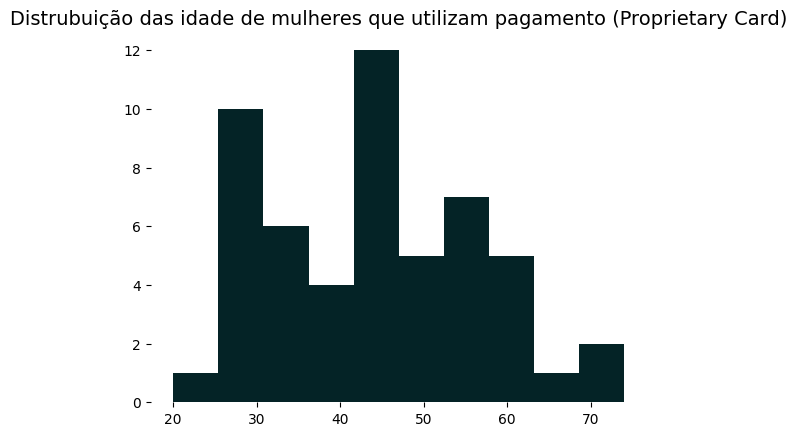

In [420]:
gp = plt.hist(
    clientes_promocionais['idade'],
    color='#042326'
);

plt.title("Distrubuição das idade de mulheres que utilizam pagamento (Proprietary Card)", fontsize=14)
# Removendo bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)


In [421]:
#analisando separadamente clientes que usam o metodo de pagamento Proprietary Card
prop_car_client = df.loc[df['metodo_de_pagamento'] == 'Proprietary Card'].reset_index(drop=True)
prop_car_client.head()

,cliente,tipo_de_cliente,numero_de_itens_comprados,venda_liquidas,metodo_de_pagamento,genero,estado_civil,idade
0,2,Promocional,1,102.40,Proprietary Card,Homem,Casado,36
1,3,Regular,1,22.50,Proprietary Card,Homem,Casado,32
2,4,Promocional,5,100.40,Proprietary Card,Homem,Casado,28
3,7,Promocional,2,78.00,Proprietary Card,Homem,Casado,30
4,9,Promocional,2,56.52,Proprietary Card,Homem,Casado,46


In [422]:
group_gen = prop_car_client.groupby('genero').size().reset_index(name='quantidade')
group_client_type = prop_car_client.groupby('tipo_de_cliente').size().reset_index(name='quantidade')
group_est_civil = prop_car_client.groupby('estado_civil').size().reset_index(name='quantidade')

In [423]:
group_client_type

,tipo_de_cliente,quantidade
0,Promocional,57
1,Regular,13


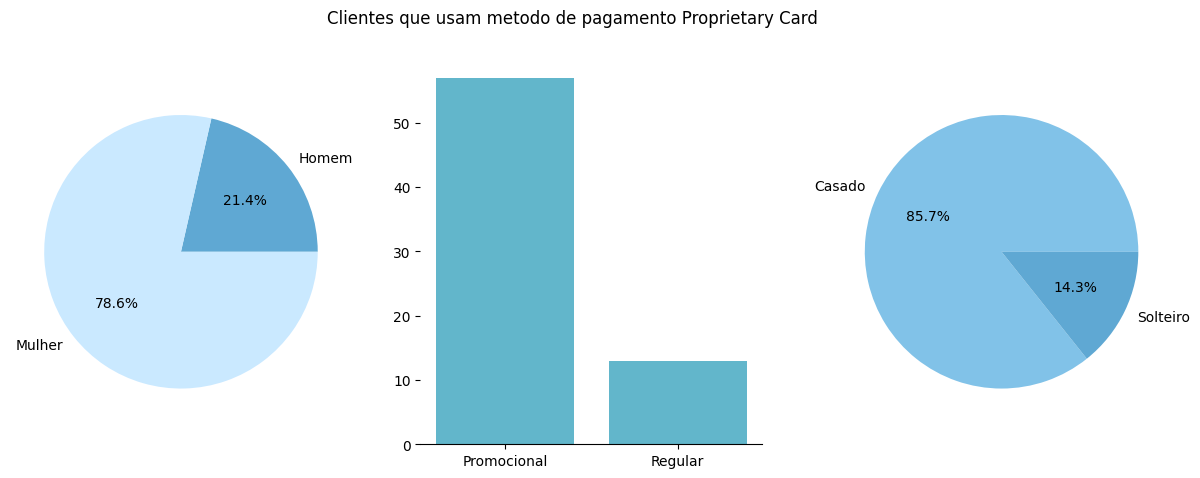

In [424]:

fig, (Ax1, Ax2, Ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

fig.suptitle('Clientes que usam metodo de pagamento Proprietary Card')


Ax1.pie(
    group_gen['quantidade'],
    labels=group_gen['genero'],
    colors=colors,
    autopct='%1.1f%%'
)

Ax2.bar(
    group_client_type['tipo_de_cliente'], 
    group_client_type['quantidade'],
    color='#62B6CB',
)
remove_bordas(Ax2)
Ax2.spines['bottom'].set_visible(True)


Ax3.pie(
    group_est_civil['quantidade'], 
    labels=group_est_civil['estado_civil'],
    colors=colors2,
    autopct='%1.1f%%'
)

#Ax3.spines['bottom'].set_visible(True)


plt.show()

## Info

Nas analises acima conseguimos identificar que **75.7%** dos nossos clientes promocionais são **mulheres** que utilizam o metodo de pagamento **Proprietary Card** e **88.7%** delas são **casadas** e possuem uma idade media de **44 anos** e compram até 4 itens

In [425]:
clientes_america_express = df.loc[df['metodo_de_pagamento'] == 'American Express'].reset_index(drop=True)
clientes_america_express.head()

,cliente,tipo_de_cliente,numero_de_itens_comprados,venda_liquidas,metodo_de_pagamento,genero,estado_civil,idade
0,23,Promocional,7,266.0,American Express,Homem,Casado,50
1,95,Regular,3,66.0,American Express,Mulher,Casado,46


In [426]:
group_gen = clientes_america_express.groupby('genero').size().reset_index(name='quantidade')
group_client_type = clientes_america_express.groupby('tipo_de_cliente').size().reset_index(name='quantidade')
group_est_civil = clientes_america_express.groupby('estado_civil').size().reset_index(name='quantidade')

In [427]:
group_client_type

,tipo_de_cliente,quantidade
0,Promocional,1
1,Regular,1


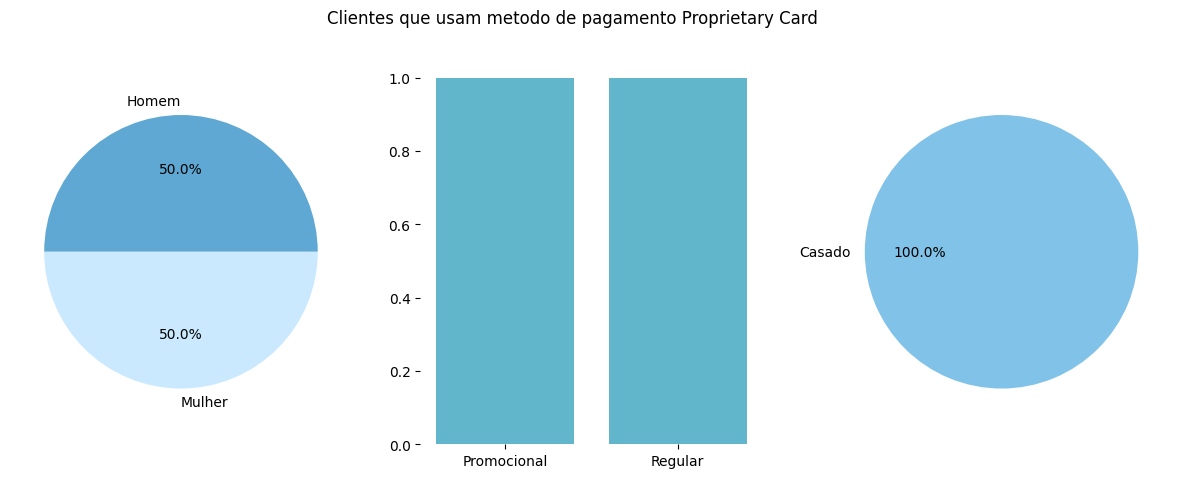

In [428]:
fig, (eix1, eix2, eix3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

fig.suptitle('Clientes que usam metodo de pagamento Proprietary Card')


eix1.pie(
    group_gen['quantidade'],
    labels=group_gen['genero'],
    colors=colors,
    autopct='%1.1f%%'
)

eix2.bar(
    group_client_type['tipo_de_cliente'], 
    group_client_type['quantidade'],
    color='#62B6CB',
)
remove_bordas(eix2)


eix3.pie(
    group_est_civil['quantidade'], 
    labels=group_est_civil['estado_civil'],
    colors=colors2,
    autopct='%1.1f%%'
)

#Ax3.spines['bottom'].set_visible(True)


plt.show()

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cliente                    100 non-null    int64  
 1   tipo_de_cliente            100 non-null    object 
 2   numero_de_itens_comprados  100 non-null    int64  
 3   venda_liquidas             100 non-null    float64
 4   metodo_de_pagamento        100 non-null    object 
 5   genero                     100 non-null    object 
 6   estado_civil               100 non-null    object 
 7   idade                      100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [430]:
df.describe().round()

,cliente,numero_de_itens_comprados,venda_liquidas,idade
count,100.0,100.0,100.0,100.0
mean,50.0,3.0,78.0,43.0
std,29.0,3.0,56.0,12.0
min,1.0,1.0,13.0,20.0
25%,26.0,1.0,40.0,32.0
50%,50.0,2.0,60.0,42.0
75%,75.0,4.0,101.0,50.0
max,100.0,17.0,288.0,78.0


Text(0, 0.5, 'itens')

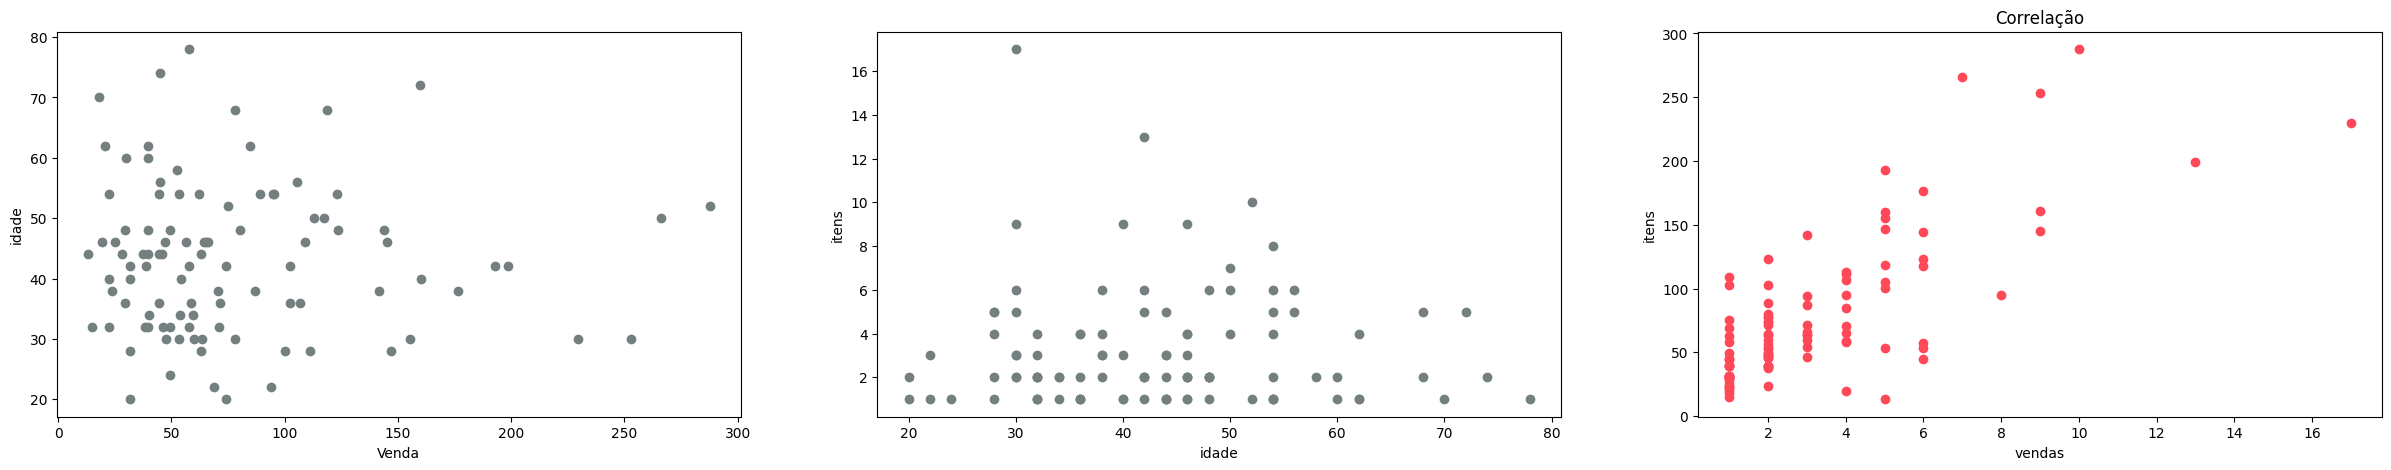

In [431]:
#Analise de correlação

fig, (itens, idade, venda) = plt.subplots(nrows=1, ncols=3, figsize=(30,5))



itens.scatter(
    df['venda_liquidas'], df['idade'],
    color='#747F7F'
    )
itens.set_xlabel("Venda")
itens.set_ylabel("idade")

idade.scatter(
    df['idade'], df['numero_de_itens_comprados'],
    color='#747F7F'
    )
idade.set_xlabel("idade")
idade.set_ylabel("itens")


venda.scatter(
    df['numero_de_itens_comprados'], df['venda_liquidas'],
    color='#FF4858'
    )
venda.set_title("Correlação")
venda.set_xlabel("vendas")
venda.set_ylabel("itens")







## Correlação dos dados🧮

Foi analisado que há uma forte correlação linear positiva entre o número de itens comprados e o valor de venda liquida
ou seja, quanto maior a quantidade de **itens comprados** maior o **valor liquido de vendas**

📌 Hipóteses:

Hipótese nula (H₀): não existe correlação linear entre as variáveis (r = 0)

Hipótese alternativa (H₁): existe correlação linear (r ≠ 0)

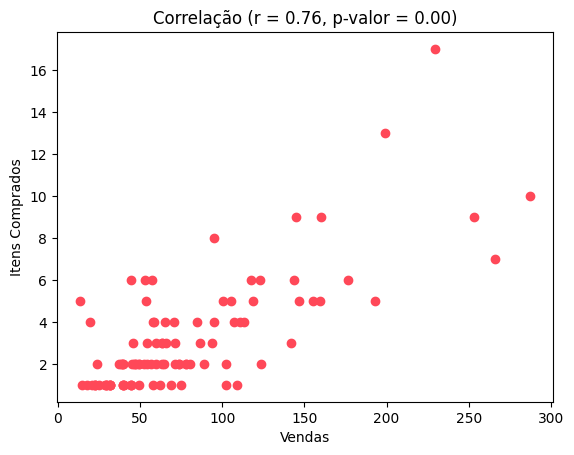

In [432]:
# Dados
x = df['venda_liquidas']
y = df['numero_de_itens_comprados']

# Coeficiente de correlação de Pearson
r, p_valor = pearsonr(x, y)

# Criar gráfico
fig, venda = plt.subplots()
venda.scatter(x, y, color='#FF4858')


# Título e rótulos
venda.set_title(f"Correlação (r = {r:.2f}, p-valor = {p_valor:.2f})")
venda.set_xlabel("Vendas")
venda.set_ylabel("Itens Comprados")


plt.show()

existe correlação linear (r ≠ 0) significativa 

Proxima Etapa Criar modelo de regressão para prever o valor de venda